## Shameless plug for my datacamp class on caret:
https://www.datacamp.com/courses/machine-learning-toolbox


# Requirements:
## R: https://cran.rstudio.com/
## RStudio: https://www.rstudio.com/products/rstudio/download/
## Download course data: https://goo.gl/ejxsWF
## Instal packages: 
- install.packages(c('ggplot2', 'data.table', 'ranger', 'caret'), repos="http://cloud.r-project.org/")

### How many hours of R programming experience do you have?
(Show of hands)
- 0 (13)
- 1 to 10 (17)
- 11 to 100 (13)
- 101 to 1000 ()
- 1000+ (3)

### Aesthetics

In [1]:
# Some things to make our plots pretty
library(scales)
my_alpha <- 0.4
point_color <- "#756bb1"
color_scale <- c(
  "#1f78b4", "#ff7f00", "#6a3d9a", "#33a02c", "#e31a1c", "#b15928",
  "#a6cee3", "#fdbf6f", "#cab2d6", "#b2df8a", "#fb9a99", "#ffff99")

# A quick introduction to ggplot2
 - Plotting library for R
 - "grammar of graphics"
 - Build plots piece by piece, e.g. you make a scatterplot as follows:
     - Make a plot of the diamonds dataset
     - Use caret as the x axis
     - Use price as the y axis
     - Add points to the plots

In [2]:
library(ggplot2)
data(diamonds)
set.seed(42)
diamonds <- diamonds[sample(1:nrow(diamonds), 5000),]
head(diamonds)

carat,cut,color,clarity,depth,table,price,x,y,z
0.71,Very Good,H,SI1,62.5,60,2096,5.68,5.75,3.57
0.79,Premium,H,SI1,61.8,59,2275,5.97,5.91,3.67
1.03,Ideal,F,SI1,62.4,57,6178,6.48,6.44,4.03
0.50,Ideal,E,VS2,62.2,54,1624,5.08,5.11,3.17
0.27,Ideal,E,VS1,61.6,56,470,4.14,4.17,2.56
0.30,Premium,E,VS2,61.7,58,658,4.32,4.34,2.67


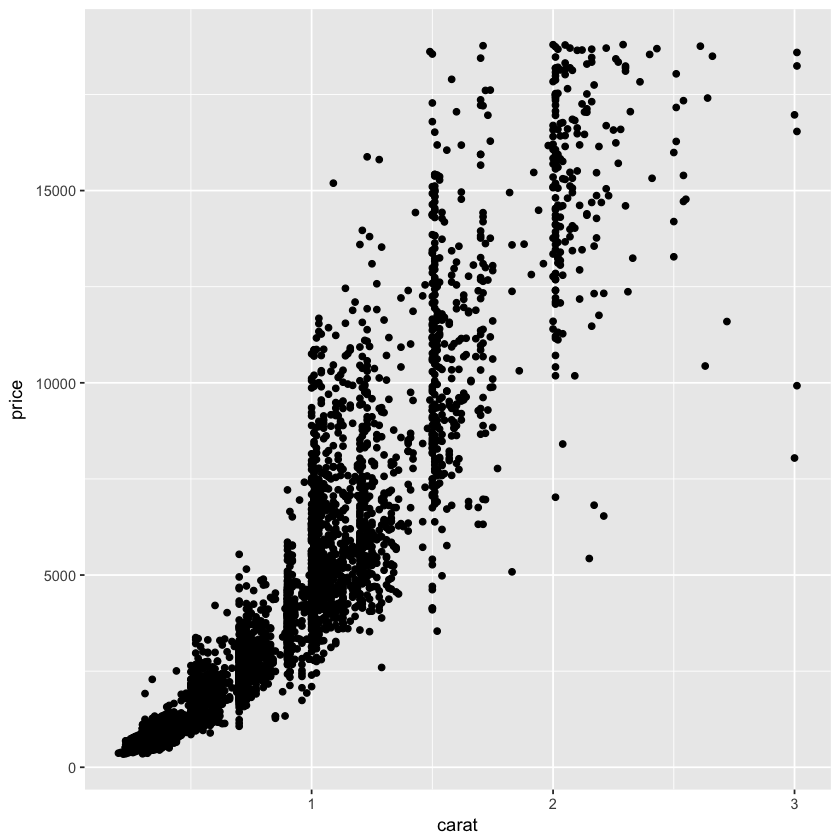

In [3]:
ggplot(diamonds, aes(x=carat, y=price)) + geom_point()

- Let's make our plot prettier: transparency (alpha), color, and a cleaner plot "theme"
- You can pass hex codes for color, or just name colors, e.g. "purple"

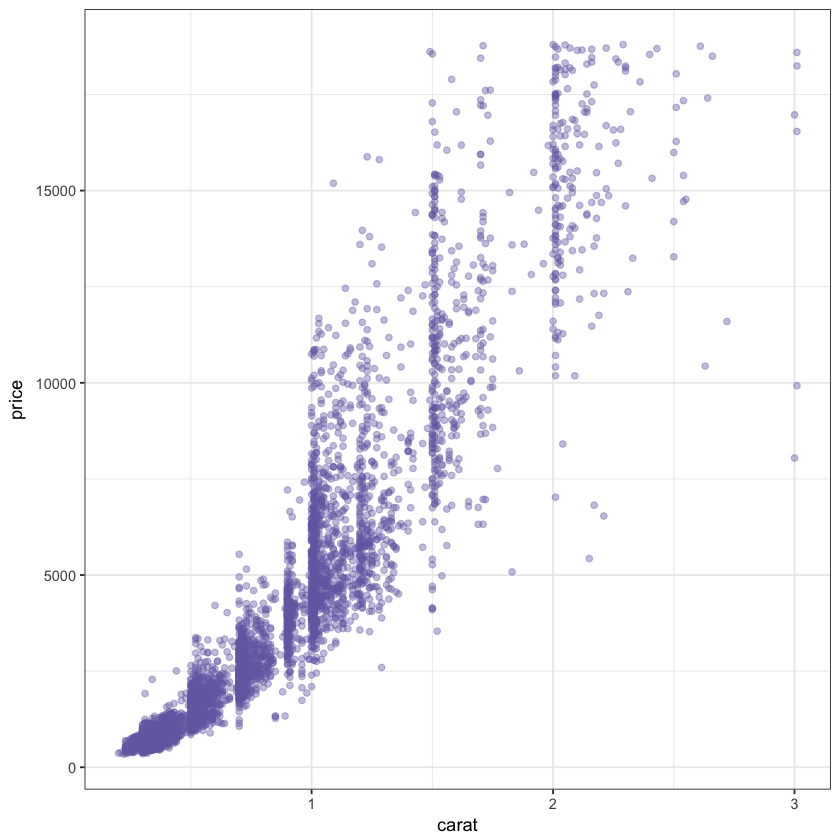

In [4]:
ggplot(diamonds, aes(x=carat, y=price)) + geom_point(alpha=my_alpha, color=point_color) + theme_bw()

- Let's change the scales

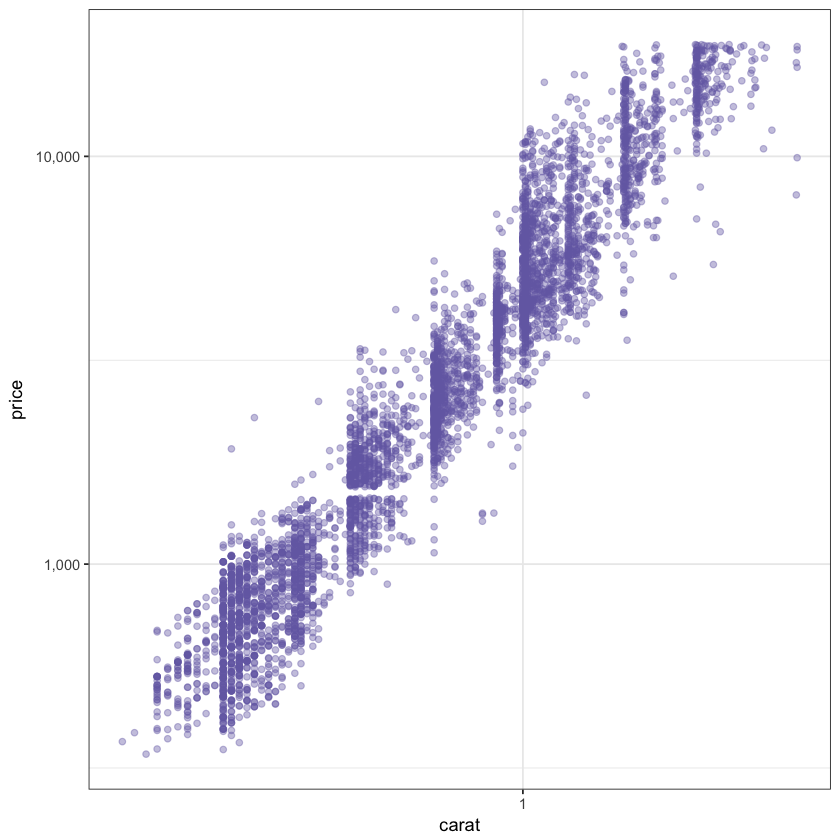

In [5]:
ggplot(diamonds, aes(x=carat, y=price)) + 
    geom_point(alpha=my_alpha, color=point_color) + theme_bw() + 
    scale_y_log10(labels=scales::comma) + 
    scale_x_log10()

- Let's go back to the original scale and add a scatterplot smoother

`geom_smooth()` using method = 'gam'


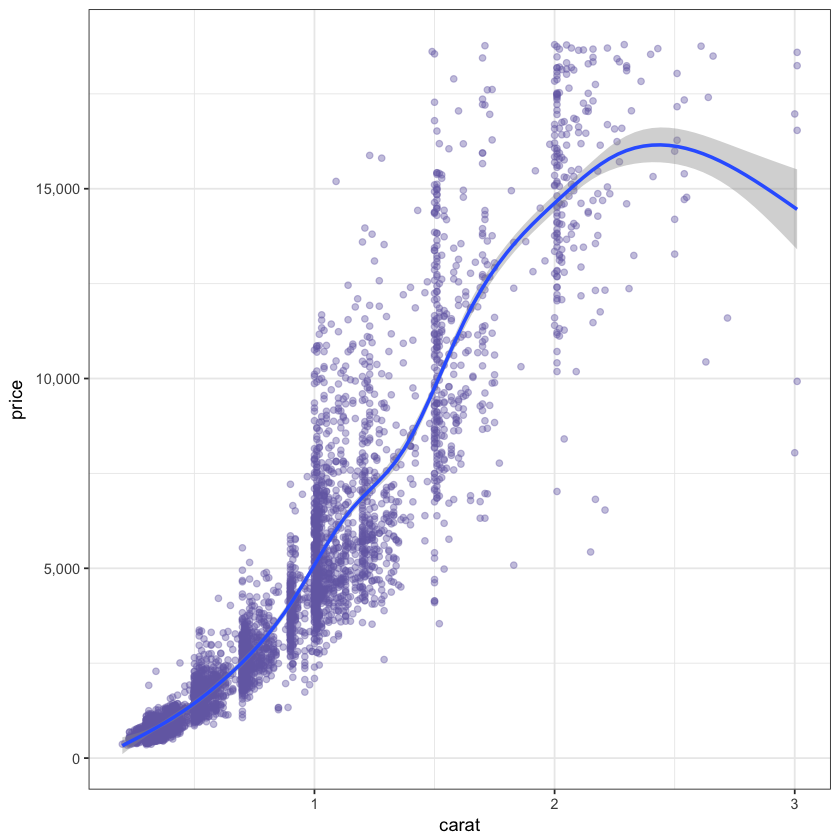

In [6]:
ggplot(diamonds, aes(x=carat, y=price)) + 
    geom_point(alpha=my_alpha, color=point_color) + 
    scale_y_continuous(labels=scales::comma) + 
    geom_smooth() + 
    theme_bw()

- Additionally, we can break the plot into panels by other variables
- Edward Tufte calls this "small multiples" and it's a very effective analytic plotting technique

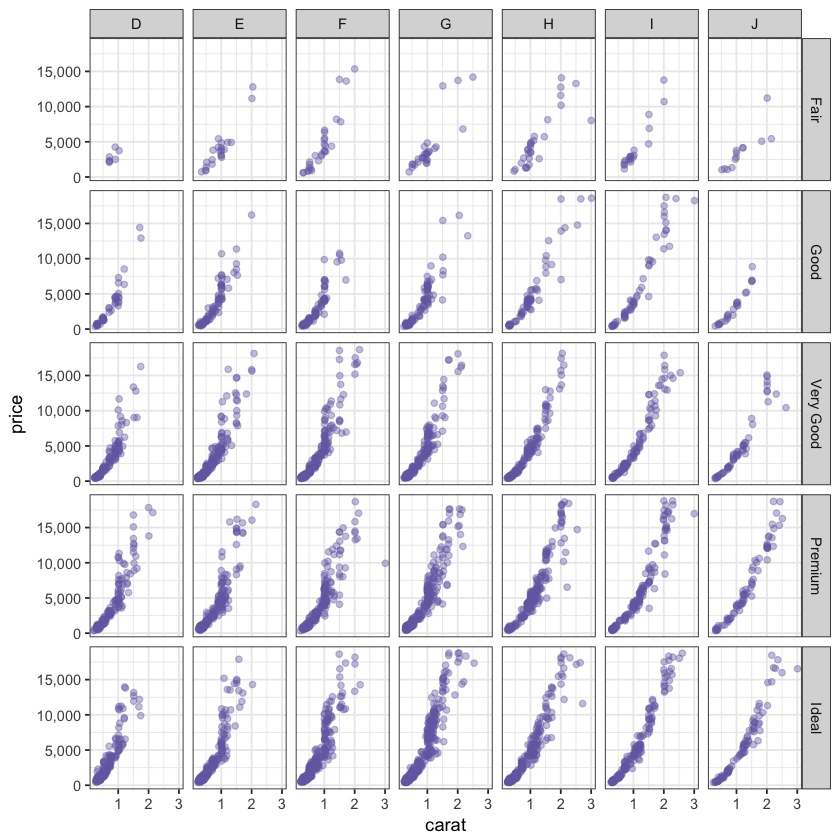

In [7]:
ggplot(diamonds, aes(x=carat, y=price, col=clarity)) + 
    geom_point(alpha=my_alpha, color=point_color) + 
    scale_y_continuous(labels=scales::comma) + 
    theme_bw() + 
    facet_grid(cut ~ color)

- I personally find scatterplots to be the most useful analytic plot
- Boxplots are very useful too:

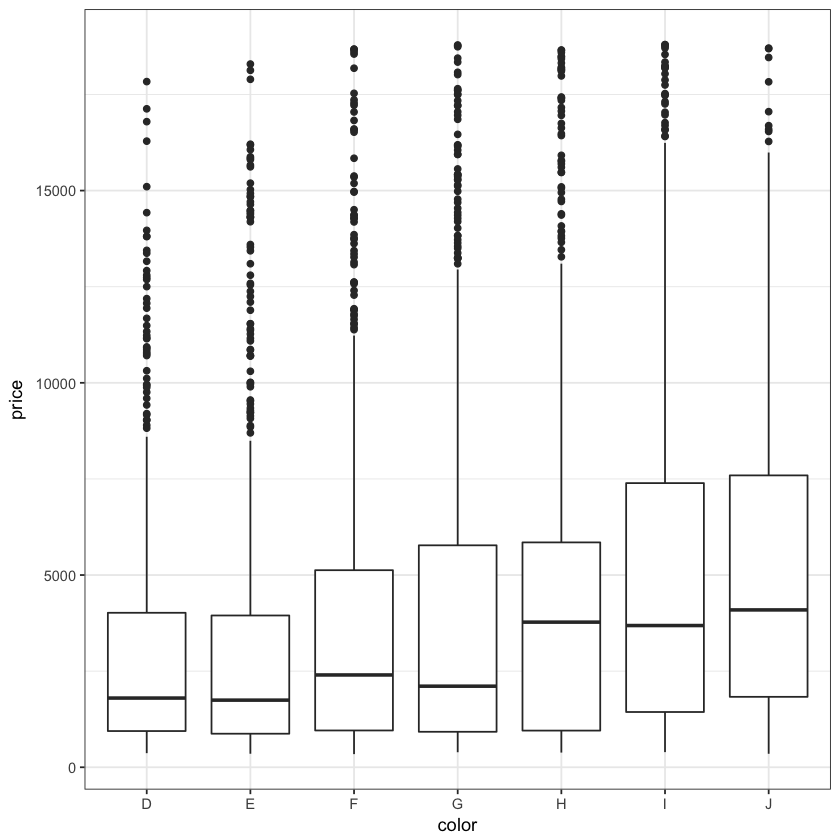

In [8]:
ggplot(diamonds, aes(x=color, y=price)) + 
    geom_boxplot() + 
    theme_bw()

- You can use log scales with boxplots too

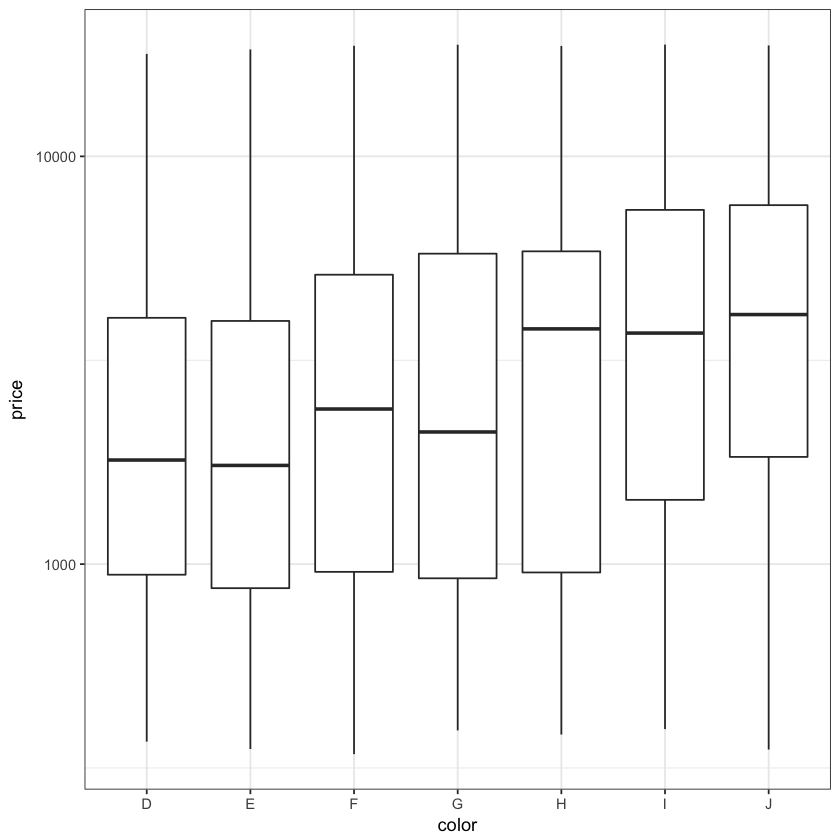

In [9]:
ggplot(diamonds, aes(x=color, y=price)) + 
    geom_boxplot() + 
    scale_y_log10() + 
    theme_bw()

- Violin plots are a pretty alternative to boxplots

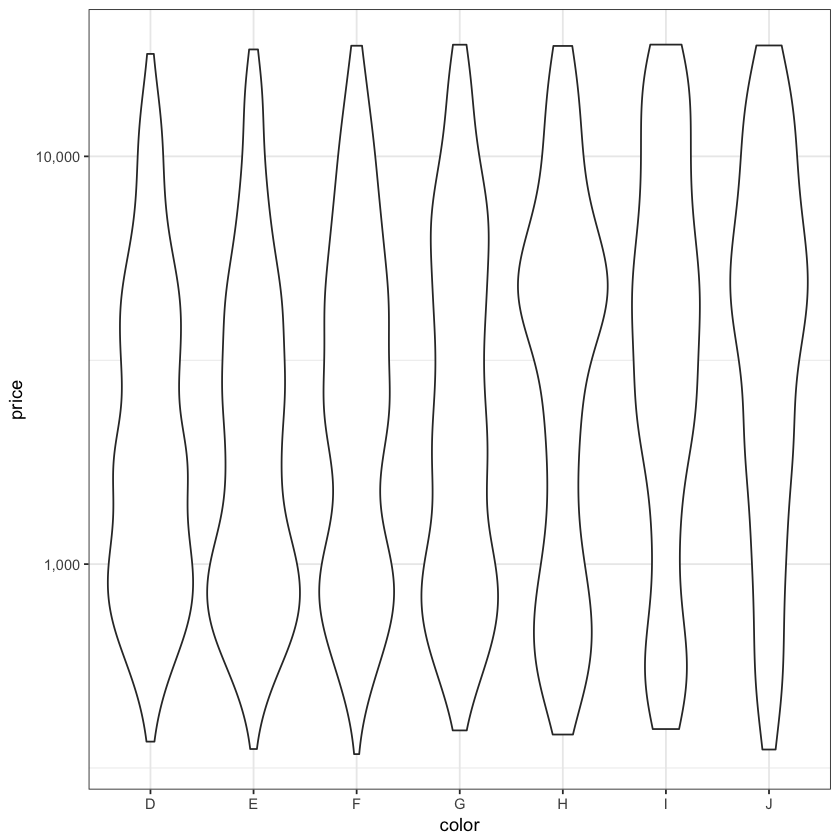

In [10]:
ggplot(diamonds, aes(x=color, y=price)) + 
    geom_violin() + 
    theme_bw() + scale_y_log10(labels=scales::comma)

- We can add our own quantiles to violin plots and color them too

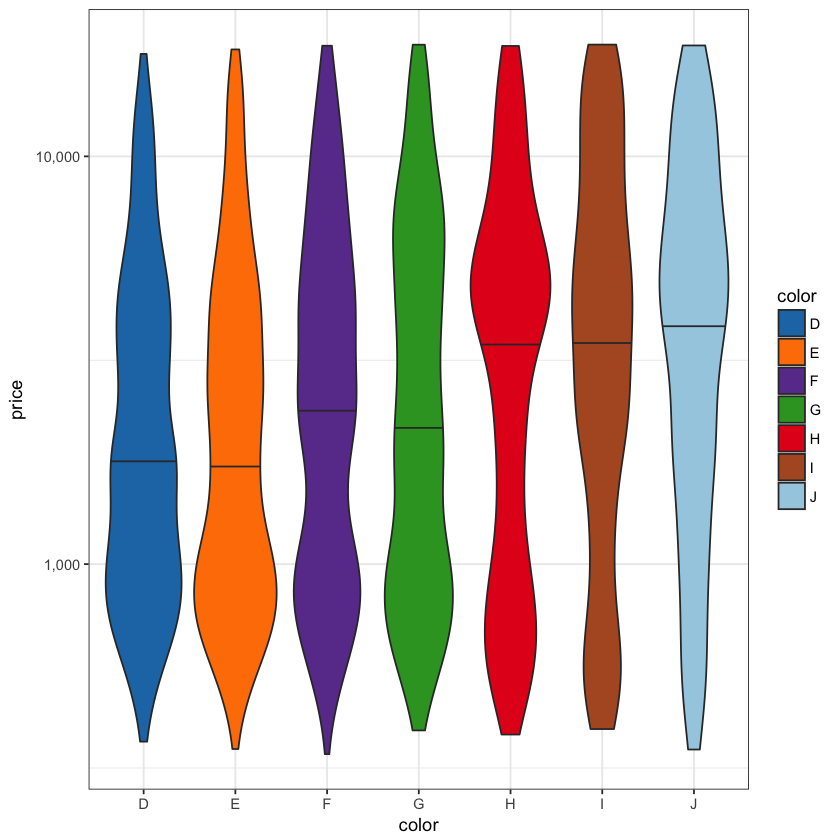

In [11]:
ggplot(diamonds, aes(x=color, y=price, fill=color)) + 
    geom_violin(draw_quantiles = c(0.50)) + 
    scale_fill_manual(values = color_scale) + 
    scale_y_log10(labels = scales::comma) +
    theme_bw()

### To Recap:
- Look at scatterplots first using geom_point()
- Add scatterplot smoothers using geom_smooth()
- Use facet_grid() to make small multiples by categorical variables
- Use boxplots to directly compare numeric variables across categories
- Use violin plots for prettier versions of box plots

# A quick introduction to data.table
- data.table is a lot like SQL
- Selection
- Aggregation
- Grouping


### data.table uses the same "[" operator as data.frame, with 2 major caveats:
- You don't need to use the "\$" sign syntax (e.g. you can just reference price, rather than diamonds$price)
- data.tables are not "copy on reference"

### data table syntax compared to SQL:
- dat[rows, column]
- dat["where clause", "select clause"]
- e.g. dat["which rows", "which columns"]
- e.g. SELECT avg(price) FROM diamonds WHERE carat=1
- is equivalent to diamonds[carat==1,mean(price)]

In [12]:
library(data.table)
dat <- data.table(diamonds)
dat[carat==1,mean(price)]

[1] 5317.442

### data table syntax compared to SQL:
- dat["where clause", "select clause", by="group by clause"]
- e.g. SELECT avg(price) FROM dat WHERE carat=1 GROUP BY cut
- is equivalent to dat[carat==1,mean(price),by='cut']

In [13]:
dat[carat==1,list(mean=round(mean(price))),by='cut']

cut,mean
Premium,5345
Ideal,6077
Very Good,5396
Fair,3900
Good,5214


### data table syntax compared to SQL:
- SELECT avg(price) FROM dat WHERE carat=1 GROUP BY cut ORDER BY 1 desc
- is equivalent to dat[carat==1,mean(price),by='cut'][order(V1, decreasing),]

In [14]:
dat[carat==1,list(mean=round(mean(price))),by='cut'][order(mean, decreasing=TRUE),]

cut,mean
Ideal,6077
Very Good,5396
Premium,5345
Good,5214
Fair,3900


### data table gives you the full power of the R language inside a SQL-like framework
- E.g. medians
- Linear regression
- And more!

In [15]:
dat[carat==1,list(med=round(median(price))),by='cut'][order(med, decreasing=TRUE),]

cut,med
Ideal,5880
Premium,5340
Good,4872
Very Good,4658
Fair,3780


In [16]:
dat[,list(med=round(median(price))),by=list(cut, carat=round(carat))][order(med, decreasing=TRUE),]

cut,carat,med
Good,3,18368
Ideal,3,17339
Premium,3,15498
Very Good,3,12916
Ideal,2,12816
Premium,2,12674
Very Good,2,12386
Fair,2,11406
Good,2,10471
Fair,3,8044


In [17]:
dat[,round(cor(carat, price), 2),by='cut']

cut,V1
Very Good,0.93
Premium,0.93
Ideal,0.93
Good,0.94
Fair,0.86


In [18]:
sink <- dat[,color := as.character(color)]
dat[,as.list(coef(lm(price ~ carat + color))),by='cut']

cut,(Intercept),carat,colorE,colorF,colorG,colorH,colorI,colorJ
Very Good,-2405.109,8203.700,16.58467,16.68045,-49.07081,-574.5877,-961.2061,-1737.222
Premium,-2227.410,8158.907,-86.14591,-424.20012,-212.50743,-733.4849,-1087.4694,-1811.669
Ideal,-2217.012,8510.148,-17.68376,19.74417,44.74408,-750.7911,-1123.0992,-2050.320
Good,-2213.998,7610.949,-42.59816,-349.93446,-160.38570,-622.7341,-442.6432,-1481.602
Fair,-2329.728,6388.749,189.40650,976.36213,-176.82620,-432.2871,-386.0563,-1434.333


### Recap
- data.table is like SQL for R
- Fast and flexible
- Great for data munging

# Now lets look at a real data problem
- Don't worry too much about following along with the code
- We'll share the jupyter notebook after the presentation
- You can look at all the gory details then
- Focus on the big picture: the data and the problem to solve
- As data scientists, this is how we approach new (potentially messy) datasets

### Modeling NCAA Men's Basketbal
- Quick demo of data.table + ggplot2 + some modeling
- Goal: Predict which team will win a game
- Could use a model like this to predict tournament outcomes

### Load the Data

The data.table and dplyr libraries are currently among the most popular tools for data munging.  You can work productively even without them, but if you haven't used them, we think you'll like the power they provide.  

In this tutorial, we will use data.table

In [19]:
library(data.table)
library(ggplot2)
dat <- fread('RegularSeasonCompactResults.csv')
head(dat)

Season,Daynum,Wteam,Wscore,Lteam,Lscore,Wloc,Numot
1985,20,1228,81,1328,64,N,0
1985,25,1106,77,1354,70,H,0
1985,25,1112,63,1223,56,H,0
1985,25,1165,70,1432,54,H,0
1985,25,1192,86,1447,74,H,0
1985,25,1218,79,1337,78,H,0


### Add team names to the team IDs

In [20]:
teams <- fread('Teams.csv')
dat <- merge(dat, teams, by.x='Wteam', by.y='Team_Id')
head(dat)

Wteam,Season,Daynum,Wscore,Lteam,Lscore,Wloc,Numot,Team_Name
1101,2014,75,73,1146,72,H,0,Abilene Chr
1101,2014,94,87,1223,81,H,0,Abilene Chr
1101,2015,31,72,1170,61,H,0,Abilene Chr
1101,2015,49,65,1354,59,N,0,Abilene Chr
1101,2015,50,69,1115,61,N,0,Abilene Chr
1101,2015,62,87,1146,70,H,0,Abilene Chr


In [21]:
teams <- fread('Teams.csv')
dat <- merge(dat, teams, by.x='Lteam', by.y='Team_Id', suffixes = c(".w",".l"))
head(dat)

Lteam,Wteam,Season,Daynum,Wscore,Lscore,Wloc,Numot,Team_Name.w,Team_Name.l
1101,1129,2015,47,77,33,H,0,Boise St,Abilene Chr
1101,1146,2017,66,81,76,A,0,Cent Arkansas,Abilene Chr
1101,1146,2017,101,84,73,H,0,Cent Arkansas,Abilene Chr
1101,1149,2017,22,66,65,A,0,Charleston So,Abilene Chr
1101,1161,2016,22,108,100,H,2,Colorado St,Abilene Chr
1101,1170,2017,47,88,86,H,2,CS Sacramento,Abilene Chr


### A little munging to make the data symmetric

In [22]:
dat[,Lloc := 'N']
dat[Wloc == 'H', Lloc := 'A']
dat[Wloc == 'A', Lloc := 'H']

## winners <- dat[,list(Season, Daynum, team1=Team_Name.w, score1=Wscore, team2=Team_Name.l, score2=Lscore, loc=Wloc)]
losers <-  dat[,list(Season, Daynum, team1=Team_Name.l, score1=Lscore, team2=Team_Name.w, score2=Wscore, loc=Lloc)]
head(winners, 1)
head(losers, 1)

In [24]:
dat = rbind(winners, losers, fill=TRUE)
dat[,point_diff := score1 - score2]

### Lets just look at 2017

In [25]:
dat <- dat[Season == 2017,][order(-abs(point_diff), team1),]
head(dat)

Season,Daynum,team1,score1,team2,score2,loc,point_diff
2017,33,Oregon,128,Savannah St,59,H,69
2017,33,Savannah St,59,Oregon,128,A,-69
2017,20,Citadel,63,Iowa St,130,A,-67
2017,20,Iowa St,130,Citadel,63,H,67
2017,20,New Hampshire,41,West Virginia,100,A,-59
2017,20,West Virginia,100,New Hampshire,41,H,59


### Initial data exploration using ggplot2

`geom_smooth()` using method = 'gam'


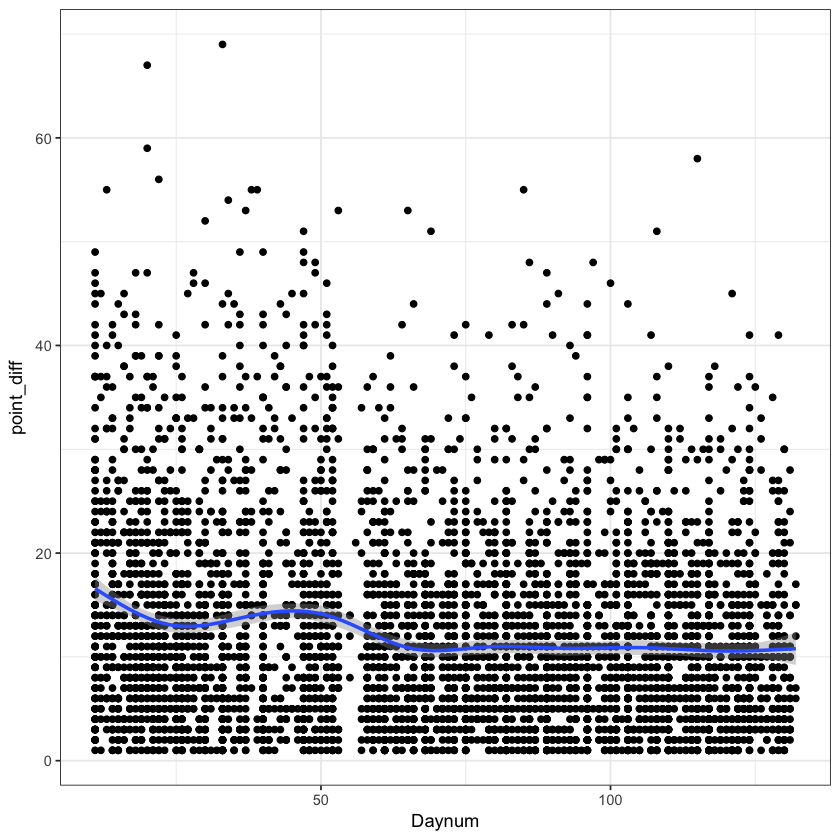

In [26]:
ggplot(dat[point_diff>=0,], aes(x=Daynum, y=point_diff)) + geom_point() + geom_smooth() + theme_bw()

### Which teams have the highest average margin of victory?

In [27]:
dat_summary = dat[,list(
    med=median(point_diff), 
    mean=mean(point_diff), 
    sd=sd(point_diff)), by='team1'][order(-med),]
head(dat_summary, 10)

team1,med,mean,sd
Gonzaga,21.0,23.42424,13.86775
Wichita St,19.0,19.30303,15.58943
SMU,15.0,14.70588,13.54349
St Mary's CA,14.5,15.50000,15.81343
UCLA,14.0,15.03030,14.62977
Cincinnati,13.5,13.64706,14.97651
North Carolina,13.0,13.42424,17.25005
Villanova,13.0,14.88235,12.48943
Oregon,12.0,13.30303,15.78069
Vermont,12.0,10.54545,13.43059


### Order factors so the plots look nicer

In [28]:
team_order = dat_summary[,team1]
dat[,team1 := factor(team1, levels=team_order)]

### Maybe a box plot will help illustrate what's going on

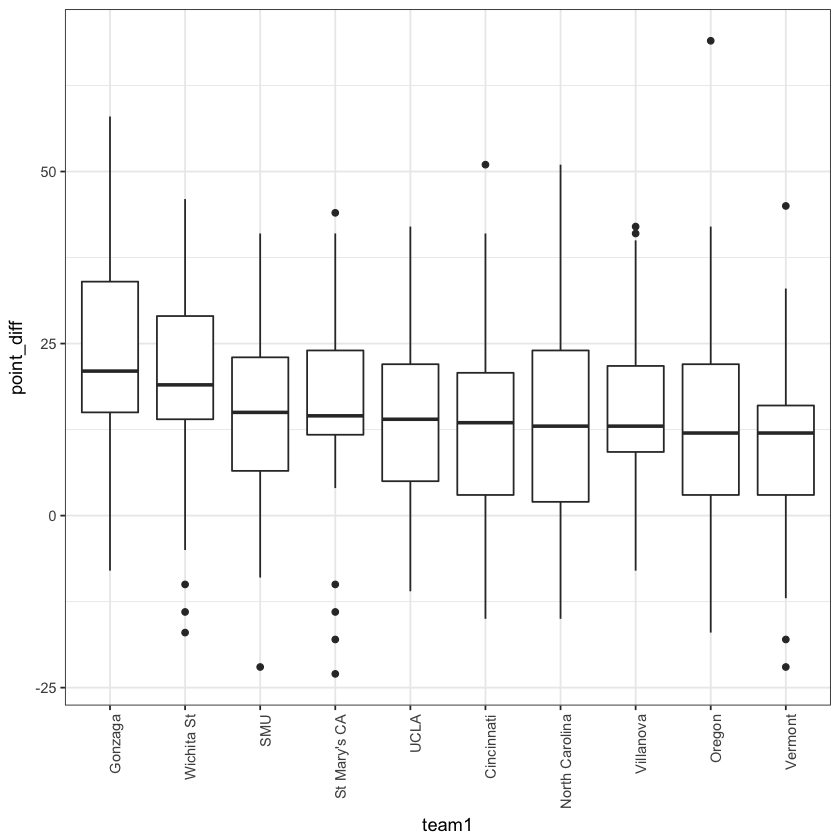

In [29]:
top10 <- dat_summary[1:10,team1]
ggplot(dat[team1 %in% top10,], aes(x=team1, y=point_diff)) + geom_boxplot() + theme_bw() + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

### Nope.  Question for the audience: what's wrong with this metric for ranking teams?

### Here's the problem: the opponent (team2) matters a lot

In [30]:
dat_summary_2way <- dat[,list(mean=mean(point_diff), .N), by=c('team1', 'team2')]
head(dat_summary_2way, 10)

team1,team2,mean,N
Oregon,Savannah St,69,1
Savannah St,Oregon,-69,1
Citadel,Iowa St,-67,1
Iowa St,Citadel,67,1
New Hampshire,West Virginia,-59,1
West Virginia,New Hampshire,59,1
Gonzaga,San Diego,47,2
San Diego,Gonzaga,-47,2
Grambling,Virginia,-56,1
Virginia,Grambling,56,1


### Further problem: teams don't play each other a lot

In [31]:
head(dat_summary_2way[order(-N),])

team1,team2,mean,N
Connecticut,South Florida,26.00000,3
South Florida,Connecticut,-26.00000,3
Maine,Vermont,-26.33333,3
Vermont,Maine,26.33333,3
Illinois St,Wichita St,-15.66667,3
Portland,St Mary's CA,-24.66667,3


### Most teams never play each other
In other words, the dataset is sparse

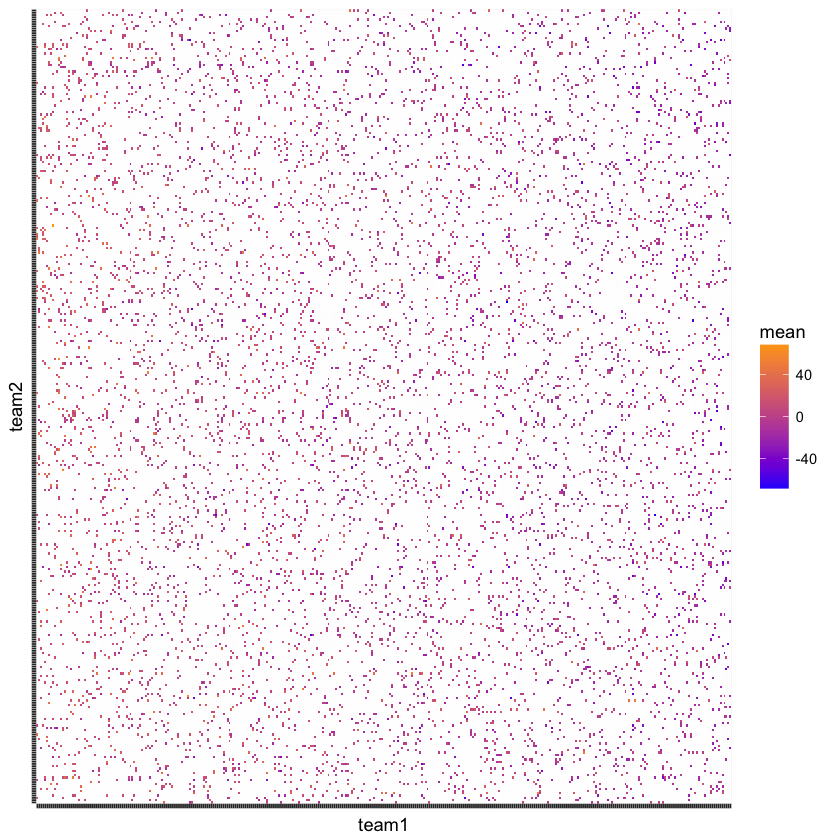

In [32]:
ggplot(data = dat_summary_2way, aes(x = team1, y = team2, fill=mean)) + 
    geom_tile() + scale_fill_gradient(low='blue', high='orange') + 
    theme(
        axis.text.x=element_blank(),
        axis.text.y=element_blank())

### Lets adjust our previous, naive model for the opponent (team2):

In [33]:
model <- lm(point_diff ~ 0 + team1 + team2, dat)

In [34]:
cf <- coef(summary(model))
cf <- data.table(var=row.names(cf), cf)
cf <- cf[order(-Estimate),]
head(cf, 10)

var,Estimate,Std. Error,t value,Pr(>|t|)
team1Gonzaga,37.63376,2.996130,12.56079,6.436214e-36
team1North Carolina,36.97106,2.980175,12.40567,4.385738e-35
team1West Virginia,36.67053,2.967959,12.35547,8.121462e-35
team1Villanova,36.64293,2.979916,12.29663,1.667039e-34
team1Kentucky,36.10189,2.960785,12.19335,5.843991e-34
team1Louisville,35.61144,2.998174,11.87771,2.536720e-32
team1Kansas,34.58480,3.000634,11.52583,1.518074e-30
team1Duke,34.33382,2.948802,11.64331,3.923659e-31
team1Virginia,34.16755,3.002555,11.37949,8.038778e-30
team1Florida,34.09399,2.999505,11.36654,9.307764e-30


### Aside: check that model is symmetric:

In [35]:
tail(cf, 10)

var,Estimate,Std. Error,t value,Pr(>|t|)
team2Florida,-34.09399,2.998321,-11.37103,8.847042e-30
team2Virginia,-34.16755,3.002924,-11.37809,8.167092e-30
team2Duke,-34.33382,2.949230,-11.64162,4.001030e-31
team2Kansas,-34.58480,2.999541,-11.53003,1.446679e-30
team2Louisville,-35.61144,2.998452,-11.87661,2.569957e-32
team2Kentucky,-36.10189,2.960967,-12.19260,5.897222e-34
team2Villanova,-36.64293,2.980109,-12.29584,1.683279e-34
team2West Virginia,-36.67053,2.965080,-12.36747,7.011137e-35
team2North Carolina,-36.97106,2.981224,-12.40130,4.627616e-35
team2Gonzaga,-37.63376,2.994870,-12.56608,6.026324e-36


### Lets add confidence intervals and make a plot:

In [36]:
cf[,lower := Estimate - 1.96 * `Std. Error`]
cf[,upper := Estimate + 1.96 * `Std. Error`]
cf[,var := factor(var, levels=var)]

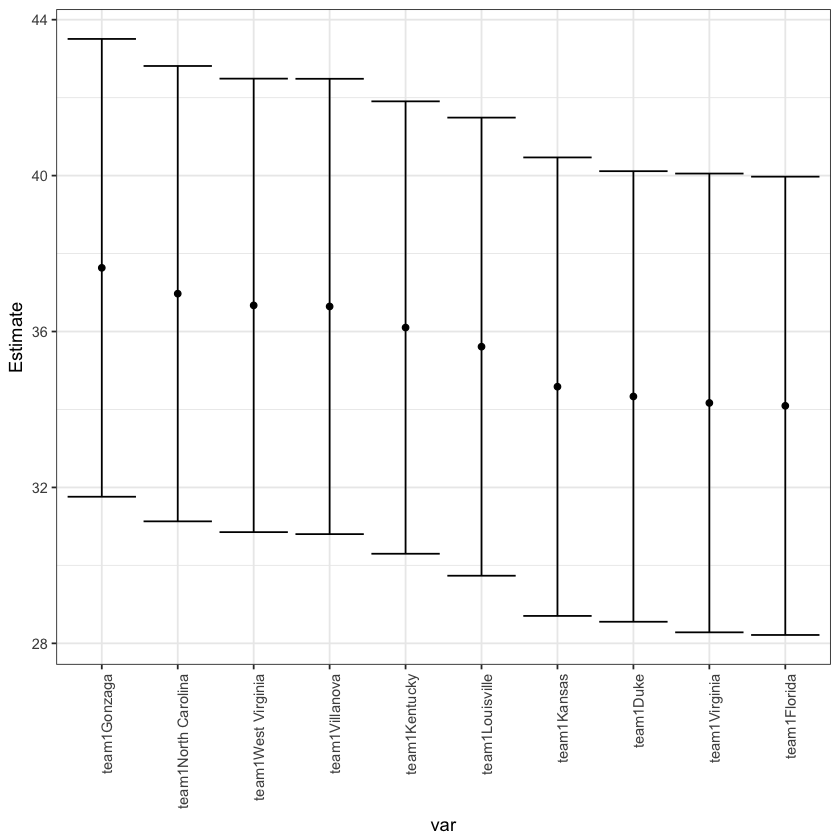

In [37]:
ggplot(
    head(cf, 10), 
    aes(x=var, y=Estimate, ymin=lower, ymax=upper)) + 
    geom_point() + geom_errorbar() + theme_bw() + 
        theme(axis.text.x = element_text(angle = 90, hjust = 1))

### This looks a lot more like what we expect

### What would we predict for the score of the championship game?

In [38]:
new_dat = data.table(team1='Gonzaga', team2='North Carolina')
predict(model, new_dat)

1 
0.6626978

### Wrong in retrospect, but seemed pretty reasonable going into the tournament
- This model is basically what I used for the Kaggle competition
- Came in 12th
- Lots of luck in that
- But not a bad model

### Can we improve this model with some machine learning?
- Lets cross validate our model
- And compare to a random forest

In [39]:
library(caret)
set.seed(42)
dat[,isHome := ifelse(loc == 'H', 1, 0)]
X <- dat[,list(team1, team2, loc)]
y <- dat[,point_diff]
myControl <- trainControl(method='cv', number=5)
model_lm <- train(X, y, method='lm', trControl=myControl)
model_lm

Loading required package: lattice


Linear Regression 

10790 samples
    3 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 8632, 8631, 8632, 8633, 8632 
Resampling results:

  RMSE      Rsquared 
  10.94264  0.4878365

Tuning parameter 'intercept' was held constant at a value of TRUE

In [40]:
model_rf <- train(X, y, method='ranger', trControl=myControl)
model_rf

Loading required package: e1071
Loading required package: ranger


note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Random Forest 

10790 samples
    3 predictor

No pre-processing
Resampling: Cross-Validated (5 fold) 
Summary of sample sizes: 8630, 8633, 8632, 8632, 8633 
Resampling results across tuning parameters:

  mtry  RMSE      Rsquared 
  2     13.69715  0.2180560
  3     13.79714  0.2141651

RMSE was used to select the optimal model using  the smallest value.
The final value used for the model was mtry = 2.

### Sometimes linear models are the best!

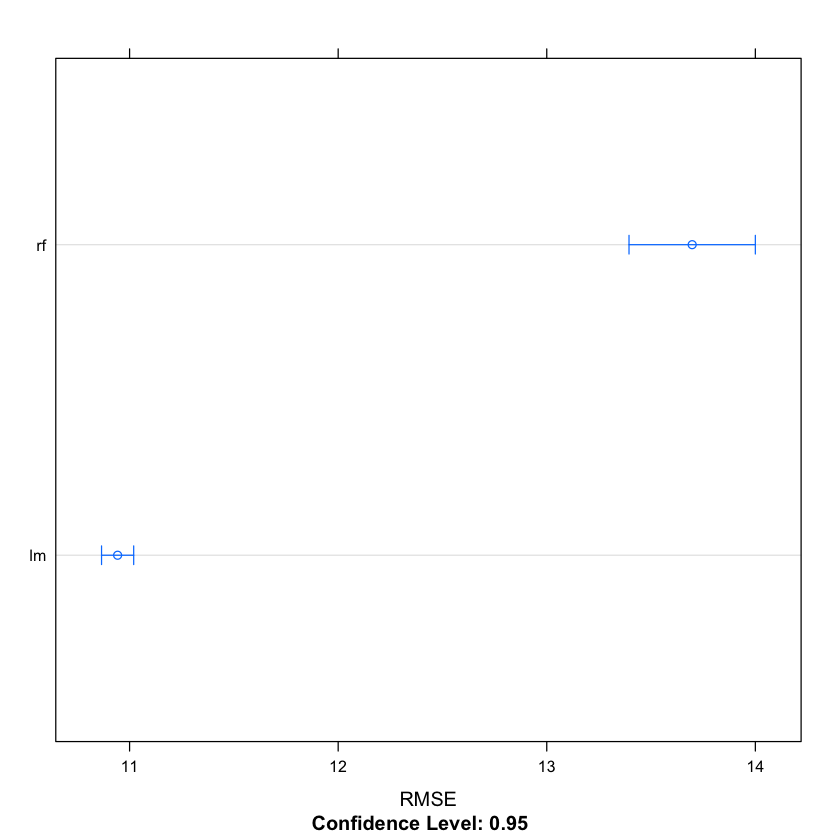

In [41]:
both_models <- resamples(list(lm=model_lm, rf=model_rf))
dotplot(both_models, metric='RMSE')